## Temperature Control Lab for Python Introduction, Parts 3 and 4

The TCLab (Temperature Control Lab) has an LED, two heaters, and two temperature sensors that are controlled with an Arduino. The heater power output is adjusted to maintain a desired temperature. Thermal energy from the heater is transferred by conduction, convection, and radiation to the temperature sensor. Heat is also transferred away from the device to the surroundings. This lab is a resource to learn data analysis, visualization, regression, and model analysis in Python with real data. Temperature control is an important problem in many applications such as:

* Maintain temperature of a home during the winter
* Pre-heat an oven for baking
* Regulate the temperature in a chemical reactor
* Reduce temperature variations during semiconductor production
* Adjust the infrared heater for a newborn baby in an incubator to maintain body temperature
* Regulate natural gas to a water heater to provide consistent hot water
* Adjust flow through a heat exchanger to maintain outlet temperature
* Others?

The heaters and LED can be adjusted between 0-100% output. The heater effect is shown in the plot below.

![Temperature Control Lab](http://apmonitor.com/pdc/uploads/Main/pid_control.gif "TCLab Test")

This Python lab covers the following topics:

* Part 3: Interpolation, Comparison to Regression
* Part 4: Solve Linear, Nonlinear, and Differential Equations

### Install TCLab and Load Packages

[Retrieve tclab.py from Github](https://github.com/APMonitor/arduino/blob/master/0_Test_Device/Python/tclab/tclab.py) if pip install is not successful such as for computers where the user does not have administrative privileges to install packages. Include tclab.py in the same directory as the Jupyter notebook.

In [20]:
# download tclab.py from 
try:
    import tclab
except:
    !pip install tclab
    import tclab

# import additional packages 
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve
from scipy.integrate import odeint

### Connect Test TCLab to Computer with USB Cable

Connect the temperature control lab with the USB cable to the computer (MacOS, Windows, or Linux). Also, attach the power supply to the __top__ barrel jack as shown below. There is an [installation guide](http://apmonitor.com/pdc/index.php/Main/ArduinoSetup) if the connection is unsuccessful.

![Temperature Control Lab Heaters](http://apmonitor.com/pdc/uploads/Main/tclab_cables.jpg "USB Cable and Heater Connection")

In [2]:
with tclab.TCLab() as lab:
    for i in range(5):
        lab.LED(100)        # Turn on LED (0-100%)
        time.sleep(0.5)     # Pause for 0.5 second
        lab.LED(0)          # Turn off LED
        time.sleep(0.5)     # Pause for 0.5 second
    print('T1: ' + str(lab.T1))
    print('T2: ' + str(lab.T2))    

TCLab version 0.4.6
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware Version 1.01.
T1: 28.31
T2: 27.96
TCLab disconnected successfully.


## Parts 1 and 2

Parts 1 and 2 should be completed before this lab. Part 1 covers Python loops, files, and plotting. Part 2 covers linear, nonlinear, and nonlinear regression. A Jupyter notebook for Parts 1 and 2 is available at the following link:

[Jupyter Notebook for TCLab Parts 1 and 2](https://nbviewer.jupyter.org/url/apmonitor.com/che263/uploads/Main/TCLab_A.ipynb)

## Part 3: Interpolation

### A: Heater Step Test Data

Turn on heater 1 to 100% and record $T_1$ and $T_2$ every 10 seconds for 3 minutes. The data should include a total of 19 data points for each temperature sensor and the recording time, starting at zero.

In [3]:
## Solution
n = 19
tm = np.empty(n)
t1s = np.empty(n)
t2s = np.empty(n)
with tclab.TCLab() as lab:
    lab.Q1(100)
    lab.Q2(0)
    st = time.time() # start time
    print('Time          T1     T2')
    for i in range(n):
        tm[i] = time.time() - st
        t1s[i] = lab.T1
        t2s[i] = lab.T2
        print(tm[i],t1s[i],t2s[i])
        time.sleep(10.0)

TCLab version 0.4.6
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware Version 1.01.
Time          T1     T2
0.0 28.31 27.92
10.0002958775 28.63 27.89
20.0048084259 30.21 27.99
30.0078690052 31.73 27.73
40.0186560154 33.47 27.96
50.0239574909 35.72 28.05
60.0333282948 37.04 28.31
70.0396783352 38.46 28.31
80.0593497753 40.52 28.63
90.0723555088 42.49 28.7
100.073702574 43.52 28.76
110.078359127 45.26 29.25
120.090393782 46.65 29.21
130.093862295 48.32 29.76
140.100008488 49.48 29.92
150.106237411 50.74 30.12
160.111050129 51.19 30.21
170.113504171 52.32 30.31
180.120512962 52.67 30.82
TCLab disconnected successfully.


### B: Interpolation

Create an interpolation function between the measured points for $T_1$ using a linear interpolation. Show the recorded $T_1$ as red dots and the linear interpolation as a black line. Add x-label and y-labels as well as a plot legend.

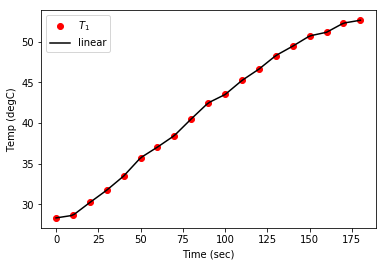

In [4]:
from scipy.interpolate import interp1d

t1L = interp1d(tm,t1s,kind=1)  # linear

n = 100
tm100 = np.linspace(tm[0],tm[-1],100)

plt.plot(tm,t1s,'ro',linewidth=2,label=r'$T_1$')
plt.plot(tm100,t1L(tm100),'k-',label='linear')
plt.xlabel('Time (sec)')
plt.ylabel('Temp (degC)')
plt.legend()

### C: Interpolation versus Regression

Create an interpolation function between the measured points for $T_2$ using a cubic spline. Compare the piecewise cubic spline to a 3rd order polynomial regression. Show the recorded $T_2$ as blue dots, the cubic spline interpolation as a black dashed line, and the polynomial regression as a red dotted line. Add appropriate labels to the plot.

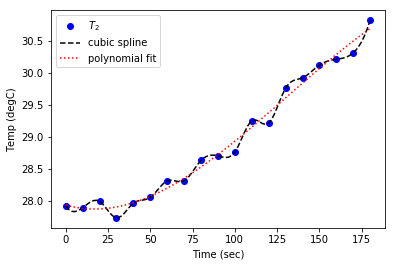

In [5]:
t2C = interp1d(tm,t2s,kind=3)  # cubic
p3 = np.polyfit(tm,t2s,3)

plt.plot(tm,t2s,'bo',label=r'$T_2$')
plt.plot(tm100,t2C(tm100),'k--',label='cubic spline')
plt.plot(tm100,np.polyval(p3,tm100),'r:',label='polynomial fit')
plt.xlabel('Time (sec)')
plt.ylabel('Temp (degC)')
plt.legend()

## Part 4: Solve Equations

### A: Linear Equations

Three points are required to specify a quadratic polynomial of the form $y =a_0 + a_1 \; x + a_2 \; x^2$. Create a quadratic regression of $T_2$ by using only the first, middle, and last data points. Suppose these were the following data points for $T_2$:

| Time (sec) | Temperature (degC)  |
|------|------|
| 0    | 23.0 |
| 90    | 33.0 |
| 180    | 43.0 |

Solve the linear regression as a set of three equations that are derived by plugging in the three data points to the polynomial equation to create three separate equations with $y=T_2$ and $x=time$.

$a_0 + a_1 \; 0 + a_2 \; 0^2 = 23.0$

$a_0 + a_1 \; 90 + a_2 \; 90^2 = 33.0$

$a_0 + a_1 \; 180 + a_2 \; 180^2 = 43.0$

In matrix form, the set of linear equations becomes: 

$\begin{bmatrix}1 & 0 & 0 \\ 1 & 90 & 90^2 \\ 1 & 180 & 180^2 \end{bmatrix}\begin{bmatrix}a_0\\a_1\\a_2\end{bmatrix} = \begin{bmatrix}23.0\\33.0\\43.0\end{bmatrix}$

Solve this set of equations for the quadratic parameters $a_0$, $a_1$, and $a_2$ with the data collected at the beginning of this notebook. Plot the quadratic fit with the data to ensure that the curve goes through the three specified data points.

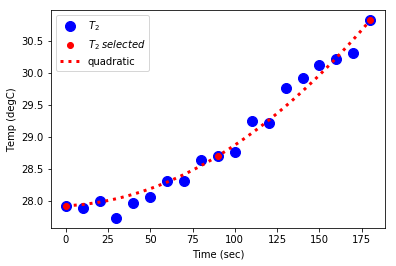

In [37]:
A = np.array([[1,0,0],[1,tm[9],tm[9]**2],[1,tm[-1],tm[-1]**2]])
b = np.array([t2s[0],t2s[9],t2s[-1]])
x = np.linalg.solve(A,b)

p2 = [x[2],x[1],x[0]]
plt.plot(tm,t2s,'bo',markersize=10,label=r'$T_2$')
plt.plot([tm[0],tm[9],tm[-1]],[t2s[0],t2s[9],t2s[-1]],'ro',label=r'$T_2 \; selected$')
plt.plot(tm100,np.polyval(p2,tm100),'r:',linewidth=3,label='quadratic')
plt.xlabel('Time (sec)')
plt.ylabel('Temp (degC)')
plt.legend()

### B: Nonlinear Equations

Fit the $T_1$ data to a nonlinear correlation using only three data points.

$T_1 = a + b \exp{(c \, time)}$

Three points are required to uniquely specify a model with three parameters. When there are more than the minimum required number of points, a least squares regression is typically performed to minimize the squared error between the measured and predicted values as done in Part 2 of this lab. For this exercise, use only 3 points (first, middle, last) of the $T_1$ data. Suppose these were the following data points for $T_1$:

| Time (sec) | Temperature (degC)  |
|------|------|
| 0    | 22.0 |
| 90.3    | 42.0 |
| 180.5    | 52.0 |

Solve for the three parameters from the three equations that exactly intersect the required data points.

$22.0 = a + b \exp{(c \, 0)}$

$42.0 = a + b \exp{(c \, 90.3)}$

$52.0 = a + b \exp{(c \, 180.5)}$

Solve this set of equations for the unknown parameters $a$, $b$, and $c$ with the data collected at the beginning of this notebook. Use guess values of $a=100$, $b=-100$, and $c=-0.01$. Plot the nonlinear fit with the data to ensure that the curve goes through the three specified data points. Add appropriate labels to the plot.

[  7.86071161e+01  -5.02971161e+01  -3.67683132e-03]


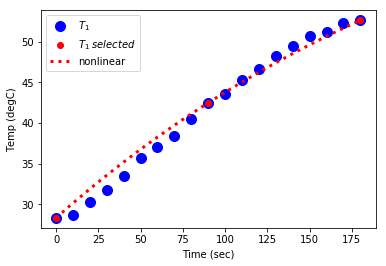

In [29]:
def Tpred(t,p):
    a,b,c = p
    return a + b * np.exp(c*t)
    
def f(p):
    eqn1 = t1s[0]  - Tpred(tm[0],p)
    eqn2 = t1s[9]  - Tpred(tm[9],p)
    eqn3 = t1s[-1] - Tpred(tm[-1],p)
    return [eqn1,eqn2,eqn3]
    
p0 = [100,-100,-0.01]    
p = fsolve(f,p0)
print(p)

tm100 = np.linspace(0,tm[-1],100)

plt.plot(tm,t1s,'bo',markersize=10,label=r'$T_1$')
plt.plot([tm[0],tm[9],tm[-1]],[t1s[0],t1s[9],t1s[-1]],'ro',label=r'$T_1 \; selected$')
plt.plot(tm100,Tpred(tm100,p),'r:',linewidth=3,label='nonlinear')
plt.xlabel('Time (sec)')
plt.ylabel('Temp (degC)')
plt.legend()

### C: Differential Equation

Use the parameters $a$, $b$, and $c$ from the prior problem to solve the following ordinary differential equation (ODE).

$\frac{dx}{dt} = c (x-a)$

The initial condition is $x_0 = a + b$. Show the ODE solution at 100 time points between the initial time and the final time. Plot the measured temperature 1 on the same plot as the ODE predicted temperature $x$. Add appropriate labels to the plot.

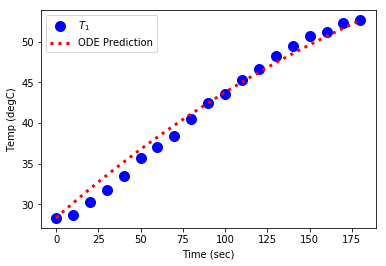

In [36]:
def g(x,t):
    dxdt = c * (x-a)
    return dxdt

t = np.linspace(0,tm[-1],100)
x0 = a+b
T1pred = odeint(g,x0,t)

plt.plot(tm,t1s,'bo',markersize=10,label=r'$T_1$')
plt.plot(tm100,T1pred,'r:',linewidth=3,label='ODE Prediction')
plt.xlabel('Time (sec)')
plt.ylabel('Temp (degC)')
plt.legend()